In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#change pyplot font size
plt.rcParams['font.size'] = 20

#change figsize
plt.rcParams['figure.figsize'] = (20,10)


In [42]:
def boxplot(variables, variable_names):
    plt.boxplot(variables)
    plt.xlabel("Variables")
    plt.ylabel("Values")
    plt.xticks(range(1, len(variable_names)+1), variable_names, rotation=0)


In [43]:
#loading data
dataset = pd.read_csv('europe.csv')

#le sacamos el nombre de los paises
variable_names = dataset.iloc[:,1:].columns
variables = dataset.iloc[:, 1:].values

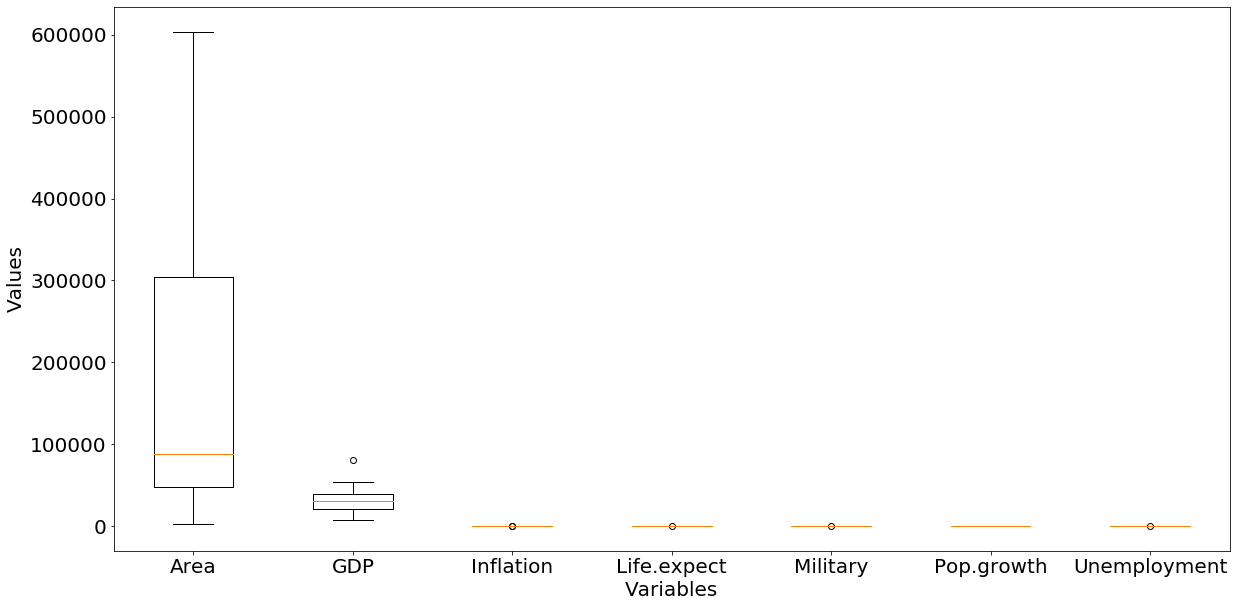

In [44]:
#ploteamos variables 
plt.figure("Raw variables")
boxplot(variables, variable_names)
plt.show()

In [45]:
#normalizamos los datos
standarized = StandardScaler().fit_transform(variables)


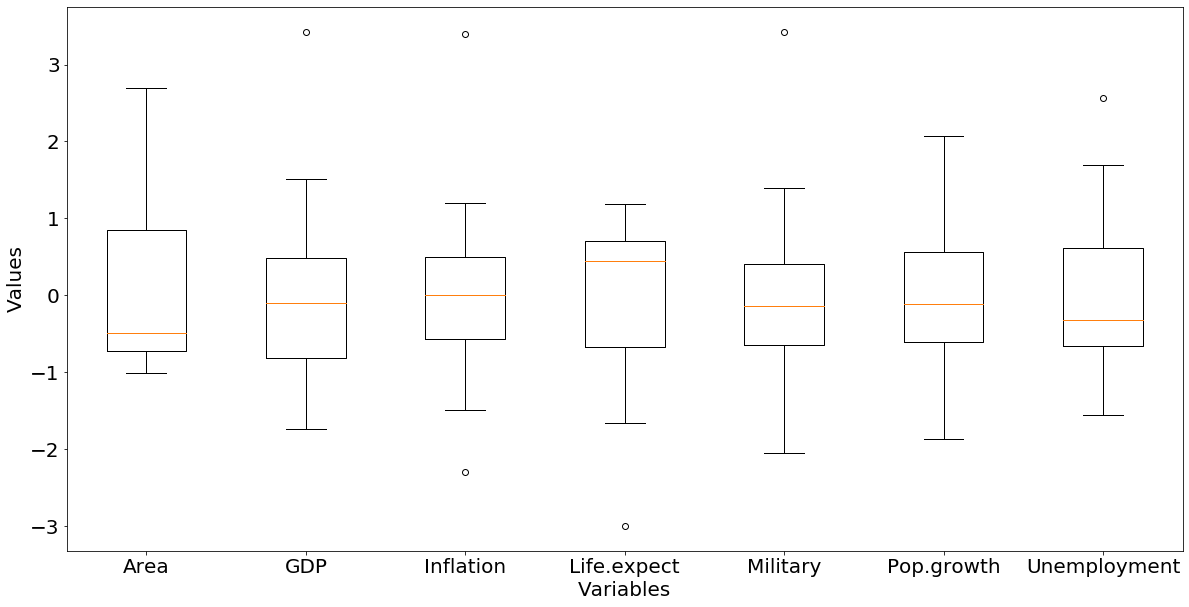

In [46]:
plt.figure("Standarized variables")
boxplot(standarized, variable_names)

plt.show()